Hello!

Saya senang bisa mereview project Anda hari ini.

Ketika Saya melihat error untuk pertama kali, Saya akan menunjukkannya. Saya akan membiarkan Anda menemukan dan memperbaikinya sendiri. Selain itu, dalam keseluruhan notebook, Saya akan mengusulkan beberapa improvisasi yang dapat dilakukan dan juga memberikan komentar terkait persepsi Anda terhadap suatu subject.Tetapi, jika Anda masih tidak dapat menyelesaikan tugas, Saya akan memberikan petunjuk yang lebih presisi di iterasi selanjutnya dan beberapa contoh praktis. Saya terbuka untuk feedbacks dan diskusi terkait topik yang sedang dibahas.

Anda akan menemukan beberapa jenis komentar saya sebagai berikut - **tolong jangan dipindah, diedit atau dihapus**.

Anda akan menemukan komentar saya dengan warna hijau, kuning dan merah sebagai berikut:

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Semua dikerjakan dengan benar.
</div>

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Beberapa rekomendasi.
</div>

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Cell ini membutuhkan perbaikan. Pengerjaan proyek tidak dapat diterima dengan komentar berwarna merah.
</div>

Kamu dapat menjawab sebagai berikut:

<div class="alert alert-block alert-info">
<b>Jawaban student.</b> <a class="tocSkip"></a>
</div>

# Prediksi Harga Mobil pada Rusty Bargain dengan Gradient Boosting

## Deskripsi Proyek
Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Dalam aplikasi tersebut, Anda bisa dengan cepat mengetahui nilai pasar mobil Anda. Anda memiliki akses ke data historis, spesifikasi teknis kendaraan, versi model kendaraan, dan harga kendaraan. Tugas Anda adalah membuat suatu model yang mampu menentukan nilai pasar mobil.

## Rusty Bargain tertarik pada:

- kualitas prediksi;
- kecepatan model dalam memprediksi;
- waktu yang diperlukan untuk melatih model

## Tujuan Proyek
Tujuan Proyek ini adalah mengembangkan model yang mampu menenentukan nilai pasar mobil untuk calon pembeli. Secara teknikal, proyek ini mencari metode terbaik dengan membandingkan metode gradient boosting dengan random forest, decision tree, dan regresi linear.

## Deskripsi Data

**Fitur**
* DateCrawled — tanggal ketika profil diunduh dari database
* VehicleType — jenis bodi kendaraan
* RegistrationYear — tahun registrasi kendaraan
* Gearbox — jenis transmisi
* Power — daya (hp)
* Model — model kendaraan
* Mileage — jarak tempuh (diukur dalam satuan km berdasarkan dataset regional tertentu)
* RegistrationMonth — bulan registrasi kendaraan
* FuelType — jenis bahan bakar
* Brand — merek kendaraan
* NotRepaired — apakah kendaraan pernah direparasi sebelumnya
* DateCreated — tanggal pembuatan profil
* NumberOfPictures — jumlah gambar kendaraan
* PostalCode — kode pos pemilik profil (pengguna)
* LastSeen — tanggal aktivitas terakhir

**Target**

* Price — harga (dalam satuan Euro)

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Narasi awal project disusun dengan baik.
</div>

In [1]:
# Load Library
import pandas as pd
import matplotlib
import numpy as np
from numpy import *
import re
from time import time

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

!pip install catboost

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None, 'display.max_columns', None)

## 1 Persiapan Data

### 1.1 Ikhtisar Data

In [2]:
# Menyiapkan dataset
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
#  Menampilkan sample data
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
# Persentase nilai hilang
df.isna().sum()/df.shape[0]

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Mileage              0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

In [6]:
# Menampilkan informasi statistik dari kolom numerik
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


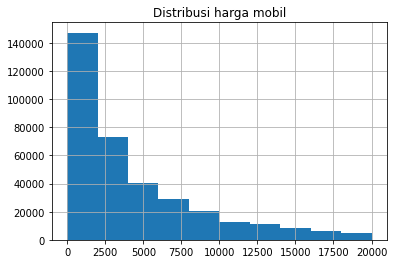

In [7]:
# Memeriksa data target
df['Price'].hist()
plt.title('Distribusi harga mobil');

Kesimpulan ikhitisar data:
1. Dataset berisi 354,369 baris dengan 15 fitur dan 1 target.
2. Ada nilai hilang pada kolom price, `VehicleType`, `Gearbox`, `Model`,`FuelType`,dan `NotRepaired`.
3. Nama kolom sebaiknya diganti menjadi snake case.
4. `DateCreated` dikonversi ke bentuk datetime.
5. `DateCrawled` dan `LastSeen` dapat dihapus karena tidak berkaitan dengan harga.
6. Rentang `RegistrationYear` harus diperiksa lebih lanjut (1000-9999).
7. `Power` yang bernilai `0` perlu diperiksa.
8. Outlier perlu diperiksa pada kolom `Mileage`.
9. Jika gambar/`Number0fPictures` bernilai `0` dihapus karena dianggap tidak informatif.
10. Pada histogram `Price` terlihat banyak yang bernilai `0`, untuk itu perlu dilakukan analisa lebih lanjut.
11. Menghapus baris duplikat jika ada.


<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Explorasi data dilakukan dengan baik.
</div>

### 1.2 Pra-Pemrosesan Data

**Mengganti nama kolom**

In [8]:
# Mengganti nama kolom dengan format `snake case`
columns = []
for name in df.columns.values:
    name = re.sub('([A-Z])', r' \1', name).lower().replace(' ', '_')[1:]
    columns.append(name)
df.columns = columns

In [9]:
# Memeriksa nama kolom yang sudah disesuaikan
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Proses penyesuaian nama kolom dilakukan dengan sukses.
</div>

**Mengganti tipe data pada kolom `date_created`**

In [10]:
# Konversi tipe data pada kolom `date_created` dari object ke datetime
df['date_created'] = pd.to_datetime(df['date_created'])
print(df['date_created'].dtypes)

datetime64[ns]


In [11]:
# Membuat kolom tahun pembuat profil dari kolom tangal pembuatan profil
df['year_created'] = df['date_created'].dt.year
df['year_created'].unique()

array([2016, 2015, 2014])

**Nilai yang hilang**

Seperti yang diketahui sebelumnya ada 5 nilai yang hilang. Bagian ini akan memroses nilai yang hilang sesuai dengan keperluan model.

`not_repaired`

In [12]:
# Menampilkan jumlah value kolom `not_repaired`
df['not_repaired'].value_counts()

no     247161
yes     36054
Name: not_repaired, dtype: int64

Ada lebih banyak mobil yang belum diperbaiki dibanding yang telah diperbaiki. Kemungkinan data yang hilang berarti belum diperbaiki, sehingga kolom yang hilang dapat diisi dengan string `no`

In [13]:
# Mengisi nilai yang hilang pada kolom `not_repaired` dengan nilai `no`
df['not_repaired'].fillna('no', inplace=True)


`model`, `vehicle_type`, `fuel_type`

Karena tidak ada cara lain untuk mengisi nilai yang hilang untuk ketiga kolom diatas, nilai ini akan diisi dengan string `n/a`.

In [14]:
# Mengisi string `n/a` untuk kolom 'model', 'vehicle_type', 'fuel_type'.
for col in ['model','vehicle_type','fuel_type']:
    df[col].fillna('n/a', inplace=True)

`gearbox`

In [15]:
# Memeriksa nilai yang hilang pada kolom `gearbox`
df['gearbox'].value_counts()

manual    268251
auto       66285
Name: gearbox, dtype: int64

Ada dua nilai pada kolom `gearbox`, nilai yang hilang akan diisi dengan nilai yang terbanyak yaitu `manual`

In [16]:
# Mengisi nilai yang hilang dengan nilai `manual`
df['gearbox'].fillna('manual', inplace=True)

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Null values dihandle dengan sesuai.
</div>

In [17]:
# Memeriksa nilai yang hilang
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
year_created          0
dtype: int64

Sudah tidak ada nilai yang hilang pada keseluruhan dataset.

**Menghapus baris duplikat**

In [18]:
# Menampilkan jumlah baris duplikat
df.duplicated().sum()

292

In [19]:
# Menghapus dan memeriksa ulang jumlah baris duplikat
df = df.drop_duplicates(ignore_index=True)
df.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Data duplikat berhasil dihilangkan.
</div>

### 1.3 Analisis Data Eksploratif

**Pembagian Dataset**

Agar model tidak mengalami overfitting (data set ikut berubah pada tahap eksplorasi), dataset dibagi dari awal. 
Sehingga drop/hapus data hanya ada di train set, sedangkan train set dan validation set tetap seperti aslinya.
Explorasi tetap dilakukan pada keseluruhan dataset, tapi penhapusan dataset hanya akan dilakukan pada train set

In [20]:
# Menetapkan fitur dan target dengan membagi dataset.
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=12345)

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Split data dilakukan dengan baik.
</div>

**Menggabungkan Train Dataset**

Untuk menjaga konsistensi jumlah baris pada fitur dan target, terlebih dahulu X_train dan y_train digabung terlebih dahulu.
Beberapa baris mungkin akan dihapus seperti outlier. Setelah itu fitur dan target dipisah kembali

In [21]:
# Menggabung X_train dan y_train
train_data = pd.concat([X_train, y_train], axis=1)

**registration_year**

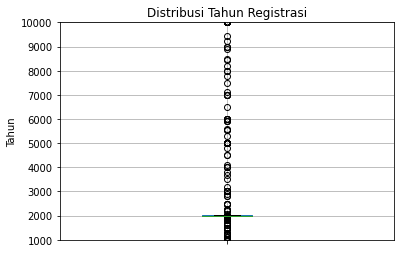

In [22]:
# Boxplot `registration_year`
df.boxplot('registration_year')
plt.ylim(1000, 10000)
plt.title('Distribusi Tahun Registrasi')
plt.xticks([1], [''])
plt.ylabel('Tahun');

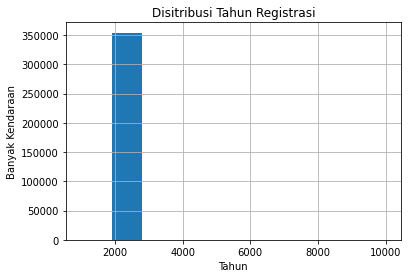

In [23]:
# Histogram `registration_year`
df.hist('registration_year')
plt.title('Disitribusi Tahun Registrasi')
plt.xlabel('Tahun')
plt.ylabel('Banyak Kendaraan');

Ada begitu banyak outlier namun sebagian besar tahun registrasi ada disekitar tahun 2000. Dari pra-pemrosesan data, Tahun terbaru dari kolom year_created adalah 2016, maka data diatas tahun tersebut tidak sesuai. Tahun tertua ditetapkan dari tahun 1900.

In [24]:
# Menghapus tahun registrasi selain diantara tahun 1900 sampai 2000 pada Train set
train_data.loc[(train_data['registration_year'] < 1900) | (train_data['registration_year'] > 2016), 'registration_year'] = np.nan
train_data = train_data.dropna(subset=['registration_year'], axis=0)
df.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Nilai anomali pada tahun registrasi diatasi dengan baik.
</div>

**price**

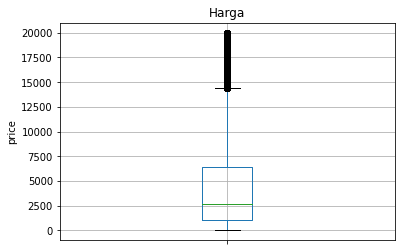

In [25]:
# Boxplot Harga
df.boxplot('price')
plt.title('Harga')
plt.xticks([1], [''])
plt.ylabel('price');

Harga kendaraan terbanyak ada di sekitar 1000 sampai 6000 euro. Harga maksimum 20000 euro dan ada nilai 0 dan 1 euro. Nilai 0 dan 1 euro ini dibiarkan saja karena mencerminkan data yang sebenarnya.

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Kolom `price` adalah kolom yang menjadi target, yang mana akan kita prediksi. Melakukan preprocessing terhadap kolom `price` atau melakukan filter berdasakan kolom `price`, akan mengarahkan model untuk memprediksi data yang bukan sebenarnya. Dalam hal ini, kita memberikan asumsi bahwa harga mobil senilai 0 atau 1 Euro adalah tidak wajar. Meskipun tidak wajar (menurut kita), data disajikan demikian sebagai target. Jadi, tetap pertahankan dengan yang ada. 
</div>

<div class="alert alert-block alert-info"><b>Jawaban student.</b>
<a class="tocSkip"></a>
    
Terima kasih atas sarannya Mas/Mba Reviewer. Saya tetap mengikutsertakan nilai 0 dan 1 euro di dataset.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

**mileage**

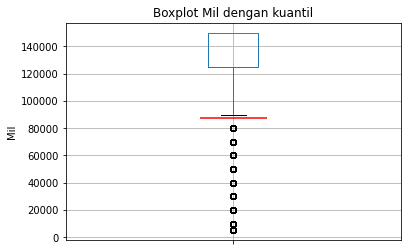

In [26]:
# Boxplot `mileage`
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
df.boxplot('mileage')
plt.hlines(y=lower_whisker, xmin=0.9, xmax=1.1, color='red')

plt.title('Boxplot Mil dengan kuantil')
plt.xticks([1], [''])
plt.ylabel('Mil');

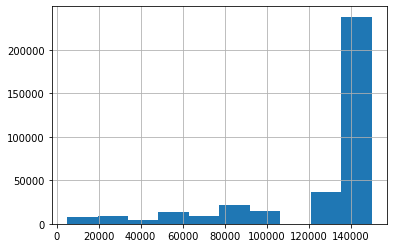

In [27]:
# Histogram `mileage`
df['mileage'].hist()
plt.show()

In [28]:
# Menghitung kendaraan dengan `mileage` yang rendah.
len(df[df['mileage'] < lower_whisker])

53216

Dari data, kendaraan dengan jarak tempuh/ mileage tinggi lebih banyak daripada yang memiliki jarak tempuh rendah. Tapi data ini dibiarkan saja seperti ini karena ini hal yang lumrah, kendaraan yang dijual bisa saja jarang digunakan atau sering digunakan.

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Eksplorasi data `mileage` dilakukan dengan baik.
</div>

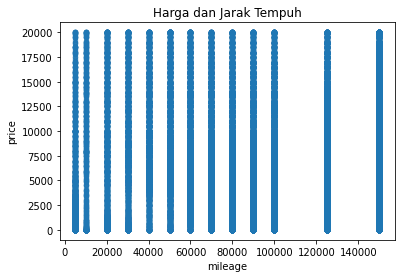

In [29]:
# Menampilkan grafik antara harga dan jarak tempuh
df.plot.scatter(x='mileage', y='price', alpha=.25)
plt.title('Harga dan Jarak Tempuh');

Tidak ditemukan pola yang jelas dari grafik diatas

**power**

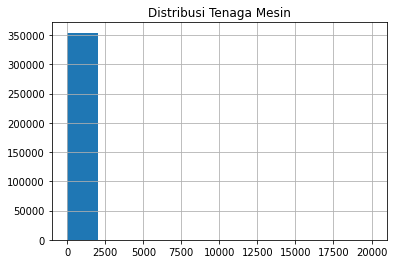

In [30]:
# Histogram tenaga mesin
df['power'].hist()
plt.title('Distribusi Tenaga Mesin');

In [31]:
# Mencari tenaga mesin diatas 2500
len(df[df['power'] > 2500])

99

In [32]:
# Mencari tenaga mesin yang sama dengan 0
len(df[df['power'] == 0])

40218

In [33]:
# Menghapus baris dengan tenaga mesin diatas 2500 dan sama dengan 0 pada trainset
train_data.loc[(train_data['power'] > 2500) | (train_data['power'] == 0), 'power'] = np.nan

train_data = train_data.dropna(subset=['power'], axis=0)
train_data.reset_index(drop=True, inplace=True)

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Eksplorasi data `power` dilakukan dengan baik.
</div>

Data tenaga mesin diatas 2500 dihapus begitu juga yang bernilai 0 karena tidak valid.

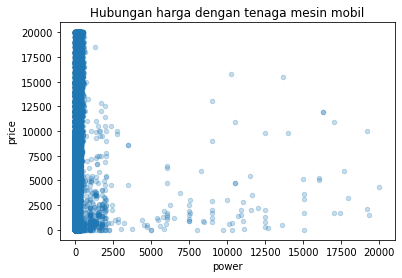

In [34]:
# Hubungan antara harga dan tenaga mesin
df.plot.scatter(x='power', y='price', alpha=.25)
plt.title('Hubungan harga dengan tenaga mesin mobil');

Tidak ada hubungan yang jelas antara harga dan tenaga mesin

**postal_code**


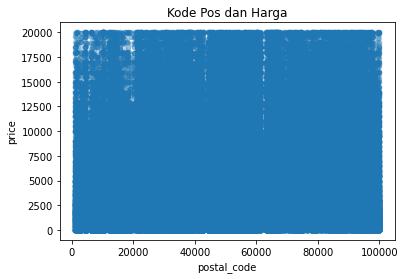

In [35]:
# Hubungan harga dan postal_code
df.plot.scatter(x='postal_code', y='price', alpha=.25)
plt.title('Kode Pos dan Harga');

Tidak ada hubungan yang jelas antara kode pos dan harga, kolom ini boleh dihapus.

## 2 Pelatihan Model

### 2.1 Persiapan Dataset

In [36]:
# Memecah fitur dan target kembali
X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

In [37]:
# Menghapus kolom yang tidak diperlukan
X_train = X_train.drop(['date_crawled','last_seen', 'number_of_pictures', 'date_created', 'postal_code'], axis=1)
X_test = X_test.drop(['date_crawled','last_seen', 'number_of_pictures', 'date_created', 'postal_code'], axis=1)
X_valid = X_valid.drop(['date_crawled','last_seen', 'number_of_pictures', 'date_created', 'postal_code'], axis=1)

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Kita bisa mempertimbangkan beberapa hal sebelum melakukan seleksi kolom yang akan menjadi features. Untuk data-data yang memang bersifat object, kita bisa drop, seperti kolom `last_seen`. Untuk data-data yang bersifat kategorical seperti `year_created` atau `registration_month` kita bisa pertahankan. Untuk melakukan filter terdahap kolom, kita perlu mengukur seberapa besar pengaruh kolom tersebut ke Target. Hal ini bisa dilakukan sebelum modeling, pada saat modeling atau setelah modeling (iterative). Hal ini biasa disebut sebagai `feature_selection` process. Coba diskusikan dengan tutor Anda untuk tahu lebih banyak terkait hal ini. 
</div>

<div class="alert alert-block alert-info"><b>Jawaban student.</b><a class="tocSkip"></a><a class="tocSkip"></a>

Okay sepertinya `year_created` dan `registration_month` bisa dipertahankan, awalnya saya pikir `car_age` sudah cukup. Khususnya registration month sebagai bulan mobil didaftarkan ke penjualan akan berpengaruh terhadap model.

</div>

**Konversi Variabel Katagorikal (Encoding)**

In [38]:
# list kolom kategorikal
cat_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

# konversi kolom ke bentuk numerik
X_train[cat_columns] = OrdinalEncoder().fit_transform(X_train[cat_columns])
X_test[cat_columns] = OrdinalEncoder().fit_transform(X_test[cat_columns])
X_valid[cat_columns] = OrdinalEncoder().fit_transform(X_valid[cat_columns])


<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Coba pertimbangkan untuk menggunakan cross validation. Library tersedia di sklearn. 
</div>

<div class="alert alert-block alert-info"><b>Jawaban student.</b><a class="tocSkip"></a><a class="tocSkip"></a>

Terima kasih atas sarannya, saya akan pakai cross validation diproyek berikutnya, berhubung saya cukup tertinggal untuk pengerjaan proyek.

</div>

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Melakukan train test split setelah melakukan preprocessing akan membuat hasil menjadi overfitting, atau tidak mencerminkan kondisi aslinya. Sebagai contoh, kita menemukan data anomali di data asli, tapi karena sudah di buang, maka data split training dan test tidak akan mengenal adanya data anomali, begitu juga model yang dikembangkan. 
    
```
   Setelah menghandle duplication, lakukan train-test split terlebih dahulu sebelum melakukan preprocessing. Silahkan lakukan apa saja pada train, termasuk melakukan drop sesuai logic yang Anda pahami. Tapi, jangan pernah drop data di test, cukup implementasikan saja preprocessing yang ditemukan pada train, ke data test. 
```
    
Konsultasikan dengan tutor Anda jika mengalami kebingungan.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Train test split sudah dilakukan dengan baik di bagian atas.
</div>

**Standard Scaling**

In [414]:
# Penerapan Standard Scaling pada fitur
sc = ss()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [415]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


(193904, 11)
(56653, 11)
(70816, 11)


### 2.2 Pemodelan

**Linear Regression**

In [416]:
# Model Regresi Linear
LR = LinearRegression()
start = time()
LR.fit(X_train, y_train)
end = time()
fit_time_LR = end - start

start = time()
y_pred = LR.predict(X_valid)
end = time()
predict_time_LR = end - start

LR_score = mean_squared_error(y_valid, y_pred) ** 0.5
LR_score

15627.292572301738

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

**Random Forest**

In [417]:
# Model Random Forest
RF = RandomForestRegressor()

start = time()
RF.fit(X_train, y_train)
end = time()
fit_time_RF = end - start

start = time()
y_pred = RF.predict(X_valid)
end = time()
predict_time_RF = end - start

RF_score_base = mean_squared_error(y_valid, y_pred) ** 0.5
RF_score_base

1929.5064161910118

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

In [418]:
# Model Random Forest dengan hyperparameter tuning
d = []
for estim in [100, 500]:
    for depth in [5,10]:
        RF = RandomForestRegressor(random_state=12345, n_estimators=estim, max_depth=depth)

        start = time()
        RF.fit(X_train, y_train)
        end = time()
        fit_time_RF_tuned = end - start

        start = time()
        y_pred = RF.predict(X_valid)
        end = time()
        predict_time_RF_tuned = end - start

        RF_score_tuned = mean_squared_error(y_valid, y_pred) ** 0.5
        d.append(
            {
                'n_estimators': estim,
                'max_depth': depth,
                'RF_score_tuned':  RF_score_tuned,
                'fit_time_RF_tuned': fit_time_RF_tuned,
                'predict_time_RF_tuned': predict_time_RF_tuned
            }
        )
best_param = pd.DataFrame(d).nsmallest(1, ['RF_score_tuned'], keep='first')
RF_score_tuned = best_param['RF_score_tuned'].values
fit_time_RF_tuned = best_param['fit_time_RF_tuned'].values
predict_time_RF_tuned = best_param['predict_time_RF_tuned'].values

best_param

,n_estimators,max_depth,RF_score_tuned,fit_time_RF_tuned,predict_time_RF_tuned
3,500,10,2110.443444,205.571199,3.04471


<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

**XGBoost**

In [419]:
# Model XGBoost
XGB = XGBRegressor(n_jobs=-1)

start = time()
XGB.fit(X_train, y_train)
end = time()
fit_time_XGB = end - start

start = time()
y_pred = XGB.predict(X_valid)
end = time()
predict_time_XGB = end - start

XGB_score_base = mean_squared_error(y_valid, y_pred) ** 0.5
XGB_score_base

1909.6861502417655

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

In [420]:
# Model XGBoost dengan hyperparameter tuning
d = []
for estim in [100, 500]:
    for depth in [5, 10]:
        XGB = XGBRegressor(random_state=12345, n_estimators=estim,
                                       max_depth=depth, n_jobs=-1)
        start = time()
        XGB.fit(X_train, y_train)
        end = time()
        fit_time_XGB_tuned = end - start

        start = time()
        y_pred = XGB.predict(X_valid)
        end = time()
        predict_time_XGB_tuned = end - start

        XGB_score_tuned = mean_squared_error(y_valid, y_pred) ** 0.5
        d.append(
                        {
                            'n_estimators': estim,
                            'max_depth': depth,
                            'XGB_score_tuned':  XGB_score_tuned,
                            'fit_time_XGB_tuned': fit_time_XGB_tuned,
                            'predict_time_XGB_tuned': predict_time_XGB_tuned
                        }
                    )

best_param = pd.DataFrame(d).nsmallest(1, ['XGB_score_tuned'], keep='first')
XGB_score_tuned = best_param['XGB_score_tuned'].values
fit_time_XGB_tuned = best_param['fit_time_XGB_tuned'].values
predict_time_XGB_tuned = best_param['predict_time_XGB_tuned'].values

best_param

,n_estimators,max_depth,XGB_score_tuned,fit_time_XGB_tuned,predict_time_XGB_tuned
1,100,10,1882.163301,57.671106,0.529749


<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

**LightGBM**

In [421]:
# Model LightGBM
LGB = LGBMRegressor()

start = time()
LGB.fit(X_train, y_train)
end = time()
fit_time_LGB = end - start

start = time()
y_pred = LGB.predict(X_valid)
end = time()
predict_time_LGB = end - start

LGB_score_base = mean_squared_error(y_valid, y_pred) ** 0.5
LGB_score_base

1942.4033214863991

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

In [422]:
# Model LightGBM dengan Hyperparameter tuning

d = []
for estim in [100, 500]:
    for depth in [5, 10]:
        LGB = LGBMRegressor(random_state=12345, n_estimators=estim,
                                       max_depth=depth)
        start = time()
        LGB.fit(X_train, y_train)
        end = time()
        fit_time_LGB_tuned = end - start

        start = time()
        y_pred = LGB.predict(X_valid)
        end = time()
        predict_time_LGB_tuned = end - start

        LGB_score_tuned = mean_squared_error(y_valid, y_pred) ** 0.5
        d.append(
            {
                 'n_estimators': estim,
                  'max_depth': depth,
                  'LGB_score_tuned':  LGB_score_tuned,
                  'fit_time_LGB_tuned': fit_time_LGB_tuned,
                  'predict_time_LGB_tuned': predict_time_LGB_tuned
                        }
                    )

best_param = pd.DataFrame(d).nsmallest(1, ['LGB_score_tuned'], keep='first')
LGB_score_tuned = best_param['LGB_score_tuned'].values
fit_time_LGB_tuned = best_param['fit_time_LGB_tuned'].values
predict_time_LGB_tuned = best_param['predict_time_LGB_tuned'].values

best_param

,n_estimators,max_depth,LGB_score_tuned,fit_time_LGB_tuned,predict_time_LGB_tuned
3,500,10,1857.209239,10.108521,2.572833


<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

**CatBoost**

In [423]:
# Model CatBoost
CB = CatBoostRegressor(verbose=0)

start = time()
CB.fit(X_train, y_train)
end = time()
fit_time_CB = end - start

start = time()
y_pred = CB.predict(X_valid)
end = time()
predict_time_CB = end - start

CB_score_base = mean_squared_error(y_valid, y_pred) ** 0.5
CB_score_base

1868.90226344181

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

In [424]:
# Model CatBoost dengan hyperparameter tuning
d = []
for iterations in [100, 500]:
    for depth in [5, 10]:
        CB = CatBoostRegressor(random_state=12345, iterations=iterations,
                                       depth=depth, verbose=0)
        start = time()
        CB.fit(X_train, y_train)
        end = time()
        fit_time_CB_tuned = end - start

        start = time()
        y_pred = CB.predict(X_valid)
        end = time()
        predict_time_CB_tuned = end - start

        CB_score_tuned = mean_squared_error(y_valid, y_pred) ** 0.5
        d.append(
            {
                            'n_estimators': estim,
                            'depth': depth,
                            'CB_score_tuned':  CB_score_tuned,
                            'fit_time_CB_tuned': fit_time_CB_tuned,
                            'predict_time_CB_tuned': predict_time_CB_tuned
                        }
                    )

best_param = pd.DataFrame(d).nsmallest(1, ['CB_score_tuned'], keep='first')
CB_score_tuned = best_param['CB_score_tuned'].values
fit_time_CB_tuned = best_param['fit_time_CB_tuned'].values
predict_time_CB_tuned = best_param['predict_time_CB_tuned'].values

best_param

,n_estimators,depth,CB_score_tuned,fit_time_CB_tuned,predict_time_CB_tuned
3,500,10,1826.400707,56.482474,0.124424


<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses modeling sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

## 3 Analisis Model

Pada bagian ini, model akan dianalisis berdasarakan nilai RMSE, kecepatan training dan kecepatan prediksi.

In [425]:
# Daftar model dalam bentuk dataframe
models = pd.DataFrame({
    'Model': ['LR', 'RF_base', 'XGB_base', 'LGB_base', 'CB_base',
             'RF_tuned', 'XGB_tuned', 'LGB_tuned', 'CB_tuned'],
    'Score': [LR_score, RF_score_base, XGB_score_base, LGB_score_base, CB_score_base,
             RF_score_tuned, XGB_score_tuned, LGB_score_tuned, CB_score_tuned],
    'Training_time': [fit_time_LR, fit_time_RF, fit_time_XGB, fit_time_LGB, fit_time_CB, fit_time_RF_tuned,
             fit_time_XGB_tuned, fit_time_LGB_tuned, fit_time_CB_tuned],
    'Prediction_time': [predict_time_LR, predict_time_RF, predict_time_XGB, predict_time_LGB, predict_time_CB, predict_time_RF_tuned,
             predict_time_XGB_tuned, predict_time_LGB_tuned, predict_time_CB_tuned]})

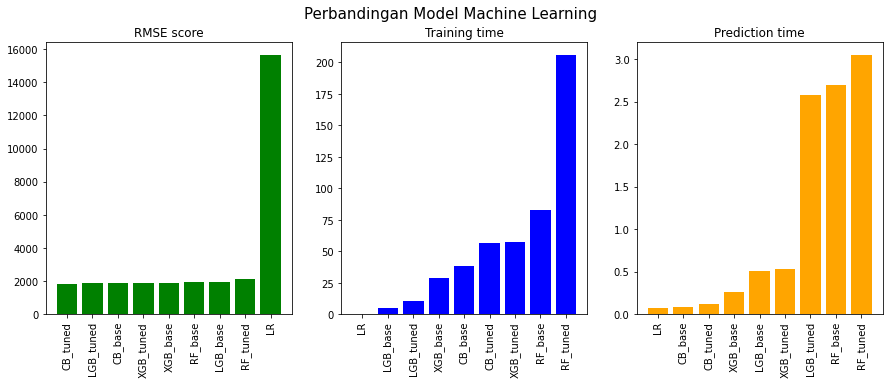

In [426]:
# Grafik perbandingan antar model
fig, axs = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Perbandingan Model Machine Learning', fontsize=15)

labels = models.sort_values(by='Score')['Model']
values = models.sort_values(by='Score')['Score']
axs[0].bar(labels, values, color = 'g')
axs[0].set_xticklabels(labels, rotation='vertical')
axs[0].set_title('RMSE score')

labels = models.sort_values(by='Training_time')['Model']
values = models.sort_values(by='Training_time')['Training_time']
axs[1].bar(labels, values, color = 'b')
axs[1].set_xticklabels(labels, rotation='vertical')
axs[1].set_title('Training time')

labels = models.sort_values(by='Prediction_time')['Model']
values = models.sort_values(by='Prediction_time')['Prediction_time']
axs[2].bar(labels, values, color = 'orange')
axs[2].set_xticklabels(labels, rotation='vertical')
axs[2].set_title('Prediction time');

Dari grafik diatas terlihat bahwa CB_tuned adalah model terbaik dari nilai RMSE, kecepatan training dan kecepatan prediksi. Perbededaan RMSE dan kecepatan training hanya sedikit berbeda dengan Model XGB_tuned, namun kecepatan prediksi cukup jauh berbeda.

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Proses membandingkan performa antar model sudah benar, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

## 4 Penerapan Model Terpilih

**Penerapan Model pada Test set**

Tidak terjadi overfitting, karena baik skor validation dan test tidak jauh berbeda.

**Penerapan Model pada Test set**

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Ada baiknya tidak melakukan train-test split lebih dari 2 kali. Jika membutuhkan data gabungan, maka disarankan bisa melakukan split diawal dengan nama variable sebagai berikut.
```
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.25, random_state=12345)
```
</div>

<div class="alert alert-block alert-info"><b>Jawaban student.</b><a class="tocSkip"></a><a class="tocSkip"></a>

Dengan pertimbangan saran reviewer saya hanya akan menerapkan model pada test set (tidak menyertakan valid set, fungsinya hanya untuk pengembangan model)

</div>

In [427]:
# Menjalankan Model pada keseluruhan dataset
CB_final = CatBoostRegressor(random_state=12345, iterations=500, depth=10, verbose=0)
start = time()
CB_final.fit(X_train, y_train)
end = time()
fit_time_final = end - start

start = time()
y_pred = CB_final.predict(X_test)
end = time()
predict_time_final = end - start

CB_final_score_test = mean_squared_error(y_test, y_pred) ** 0.5
print('test RMSE score, eur:', round(CB_final_score_test,0))
print('Training time, sec:', round(fit_time_final,0))
print('Prediction time, sec:', round(predict_time_final,2))

test RMSE score, eur: 1801.0
Training time, sec: 55.0
Prediction time, sec: 0.21


<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Ada baiknya juga dipertimbangkan untuk melakukan pengecekan underfitting atau overfitting dari RMSE cross validation ke RMSE data test, untuk menghilangkan faktor bias.
</div>

**Sanity Check**

In [431]:
# Model Linear Regression sebagai baseline
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LR_score_test = mean_squared_error(y_test, y_pred) ** 0.5
LR_score_test

19936.63337860513

Persentase perbedaan akurasi antara Model Catboost Final dan Model Baseline

In [429]:
diff_error = round(((LR_score_test - CB_final_score_test)/LR_score_test)*100,2)
print('Perbedaan Nilai RMSE adalah ', diff_error, '%')

Perbedaan Nilai RMSE adalah  90.97 %


Nilai RMSE Model Akhir (CatBoost Final) lebih tinggi 90.97 % dari pada Model Baseline, yang berarti bahwa Model Akhir ini sangat baik untuk prediksi.

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Sanity check dilakukan dengan baik, hanya perlu menyesuaikan bagian train-test split dan preprocessingnya dulu.
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Good job.
</div>

## 5. Kesimpulan

Tujuan proyek ini mengembangkan model yang mampu menenentukan nilai pasar mobil untuk calon pembeli. Secara teknikal, proyek ini mencari metode terbaik dengan membandingkan metode gradient boosting dengan random forest, decision tree, dan regresi linear. Model diharapkan memiliki tingkat kesalahan yang rendah dan memiliki kecepatan prediksi yang tinggi.

Berikut ini langkah-langkah yang telah ditempuh dalam proyek ini:
1. Pada ikhtisar data ditemukan beberapa format fitur yang salah dari sisi penamaan, nilai yang hilang, tipe data, baris duplikat dan data-data yang tidak informatif. Hal-hal tersebut diperbaiki di pra-pemrosesan data.
2. Outlier dihapus pada bagian analisis data eksploratif.
3. Ada 6 fitur kategorikal yang dikonversi ke numerik.
4. Dataset dibagi menjadi train, validation dan test set.
5. Model yang diuji adalah Linear Regression, Random Forest, XGBoost, LightGBM, dan CatBoost. Dengan menggunakan hyperparameter pada semua model, ditemukan bahawa Model CatBoost terpilih dari sisi nilai RMSE, kecepatan training dan kecepatan prediksi.
6. Model terpilih diuji kembali pada keseluruhan dataset.
7. Sanity check membuktikan bahwa Model CatBoost dengan hyperparameter memiliki tingkat kesalahan lebih rendah 90.97 % % dari Model Base line.

Ketik 'x' untuk menandakannya sebagai selesai. Lalu, tekan tombol Shift+Enter

- [x]  Jupyter Notebook bisa dibuka
- [X]  Tidak ada kesalahan pada kode
- [X]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi
- [X]  Data telah diunduh dan disiapkan- [ ]  Model sudah dilatih
- [X]  Analisis terhadap kecepatan dan kualitas model telah dilakukan